In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [3]:
errors = pd.read_excel("../results/odom_error.ods", sheet_name=None, header=None, names=['surface', 'error'], engine="odf")

In [4]:
original_classes = errors['4W']['surface']
fixed_classes = [
    'laminate flooring',
    'short carpet',
    'long carpet',
    'artificial grass',
    'pcv foamboard',
    'linoleum',
    'ceramic tiles',
    'osb',
    'foam underlayment',
    'eva foam tiles',
]
assigned_labels = [0 if label in ('3_Wykladzina_jasna', '4_Trawa')
               else 2 if label in ('5_Spienione_PCV', '8_Pusta_plyta', '9_podklady', '10_Mata_ukladana')
               else 1 for label in original_classes] # Pawel set

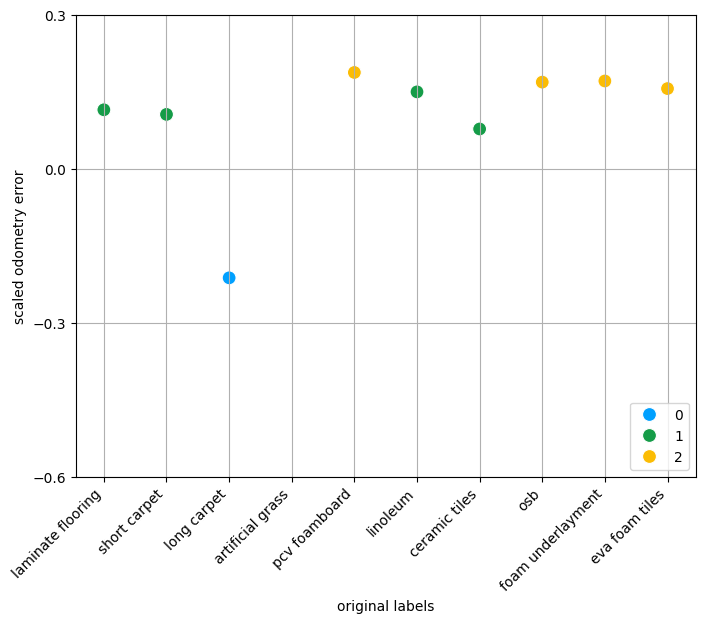

In [7]:
nicer_green = '#159C48'
nicer_blue = '#00A0FF'
orange = '#FBBC04'

plt.rcParams['figure.figsize'] = [8, 6]
colors = [nicer_blue if label == 0 else nicer_green if label == 1 else orange for label in assigned_labels]
scatter = sns.scatterplot(x=fixed_classes, y=errors['6W']['error'], hue=assigned_labels, palette=[nicer_blue, nicer_green, orange], s=100)
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(ticks=np.arange(-6, 6, 3) / 10)
plt.xlabel('original labels')
plt.ylabel('scaled odometry error')
plt.legend(loc='lower right')
plt.ylim(-0.6, 0.3)
plt.grid()
plt.savefig(r'../results/odom_error_6W_300dpi.png', dpi=300, bbox_inches="tight")